# 📅 **Publication Details**  

- **Date Published:** November 26, 2024  
- **Author:** Adnan Alaref  

# ◍ Hash Encoding (Feature Hashing)

Hash encoding, also known as feature hashing, is a method for encoding string (categorical) features into numeric values suitable for machine learning models. It is particularly useful for handling high-cardinality datasets.

## 🔸 Key Concepts

- **Traditional Encoding Methods**: Typically, string features are encoded using techniques like one-hot encoding or label encoding. These methods can be inefficient, especially with features that have a large number of unique values (high cardinality).
  
- **How Hash Encoding Works**:  
  Instead of creating separate binary columns for each unique category (as in one-hot encoding), hash encoding uses a hash function to map string features to integers. This reduces the dimensionality by producing a fixed-size vector for all categories, regardless of the number of unique values.

## 🔸 Advantages of Hash Encoding

- **Efficiency**: It handles high-cardinality features efficiently without the need to store large vectors for each category.
- **Scalability**: Hash encoding is scalable and works well with datasets having a large number of unique categories.
- **Memory Usage**: It consumes less memory compared to methods like one-hot encoding, which can become expensive in terms of memory usage when there are many categories.

## 🔸 Potential Drawbacks

- **Collisions**: Hash collisions may occur if two different categories are mapped to the same hash value. This can introduce noise into the model.
- **Interpretability**: Since the encoding relies on a hash function, the resulting numeric values do not directly correspond to the original categories, making it harder to interpret the model’s decision-making process.

## 🔸 Example Workflow

1. **Apply Hashing**: Use a hash function (e.g., MD5, SHA-1) to convert string categories into integer values.
2. **Map to Fixed Size**: The resulting integer is then mapped to a fixed-size vector, often using modulo operation to ensure the vector size remains constant.
3. **Model Input**: The resulting numeric vectors are used as inputs to machine learning models.


# ◍ Dataset Overview: `simulated-churn-data`

I have created a dataset called **`simulated-churn-data`** which contains the following features:

## 🔸 Features:
- **Categorical Features**:
  - **Gender**: Represents the gender of the user (e.g., Male, Female).
  - **Country**: Represents the country of the user (e.g., USA, Canada, etc.).
  - **SubscriptionType**: Represents the type of subscription the user has (e.g., Basic, Premium, etc.).
  
- **Target Variable**:
  - **Churn**: A binary target variable indicating whether the user has churned or not.  
    - **1**: The user has churned.  
    - **0**: The user has not churned.

## 🔸 Dataset Details:
- The dataset contains **1000 rows** and **4 columns**.
  - **3 columns** are categorical (object/character type).
  - **1 column** is numeric (integer type).  

## 🔸 Plan:
I will apply **hash encoding** over the categorical features (**Gender**, **Country**, **SubscriptionType**) in this dataset.  
Hash encoding (or feature hashing) will be used to map string categorical variables into numeric values, which is particularly useful for handling high-cardinality features in machine learning models.


**Let's to code**

# ◍ Step 1: Import Library.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier 

sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 10)

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# ◍ Step 2: Read Dataset.

In [2]:
df_data = pd.read_csv(r'/kaggle/input/simulated-churn-data/Simulated Customer Data.csv')
df_data

,Gender,Country,SubscriptionType,Churn
0,Male,India,Premium,1
1,Female,Egypt,Free,0
2,Male,Egypt,Premium,1
3,Male,Egypt,Free,1
4,Male,Germany,Basic,0
...,...,...,...,...
995,Male,USA,Basic,0
996,Male,UK,Premium,1
997,Female,Canada,Basic,1
998,Female,India,Premium,0


# ◍ Step 3: Dataset Exploration | Overview.

In [5]:
df_data.head(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Gender,Country,SubscriptionType,Churn
0,Male,India,Premium,1
1,Female,Egypt,Free,0
2,Male,Egypt,Premium,1
3,Male,Egypt,Free,1
4,Male,Germany,Basic,0


In [7]:
df_data.tail(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Gender,Country,SubscriptionType,Churn
995,Male,USA,Basic,0
996,Male,UK,Premium,1
997,Female,Canada,Basic,1
998,Female,India,Premium,0
999,Male,UK,Basic,1


In [8]:
df_data.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Gender,Country,SubscriptionType,Churn
466,Female,India,Free,0
918,Female,USA,Free,0
282,Female,USA,Free,0
617,Female,UK,Basic,1
246,Male,Canada,Premium,0


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Country           1000 non-null   object
 2   SubscriptionType  1000 non-null   object
 3   Churn             1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


 **Info About Our Dataset**

- **Dataset Overview**:  
  The dataset consists of 1000 rows and 4 columns.
  
  - **Columns**:
    - **3 columns** contain object (or character) classes.
    - **1 column** contains integer values (numeric class).
  
- **Alternative Quick Check**:  
  An alternative way to quickly check the number of rows and columns in a dataset is by using the `shape` attribute in Python, like this:

  ```python
  data.shape


In [11]:
df_data.shape

(1000, 4)

In [13]:
df_data.describe(include = 'object').T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,count,unique,top,freq
Gender,1000,2,Female,510
Country,1000,6,Egypt,178
SubscriptionType,1000,3,Basic,349


In [14]:
df_data.describe(include = 'number').T.style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,count,mean,std,min,25%,50%,75%,max
Churn,1000.000000,0.514000,0.500054,0.000000,0.000000,1.000000,1.000000,1.000000


In [16]:
df_data[(df_data['Gender']=='Male') & (df_data['SubscriptionType'] == 'Premium')]

,Gender,Country,SubscriptionType,Churn
0,Male,India,Premium,1
2,Male,Egypt,Premium,1
6,Male,Germany,Premium,1
7,Male,UK,Premium,1
8,Male,Germany,Premium,0
...,...,...,...,...
966,Male,Germany,Premium,0
969,Male,Germany,Premium,0
971,Male,USA,Premium,0
972,Male,Germany,Premium,1


# ◍ Step 4: EDA.

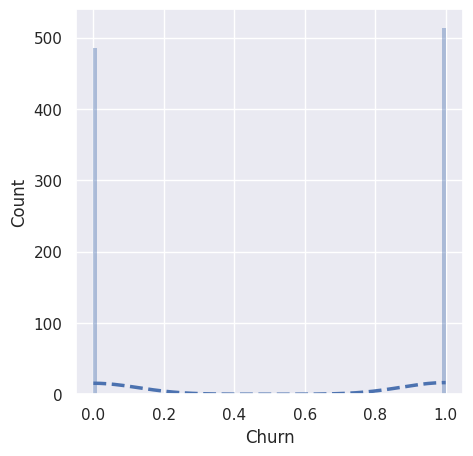

In [3]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
sns.histplot(data = df_data ,x = df_data.Churn ,bins = 100 ,kde = True ,edgecolor = 'none' ,alpha = 0.4 ,line_kws = {'linestyle':'--','lw':2.5})
#plt.title('Churn' ,fontsize = 12)
plt.xlabel('Churn',fontsize = 12)
plt.ylabel('Count' ,fontsize =12)
plt.show()

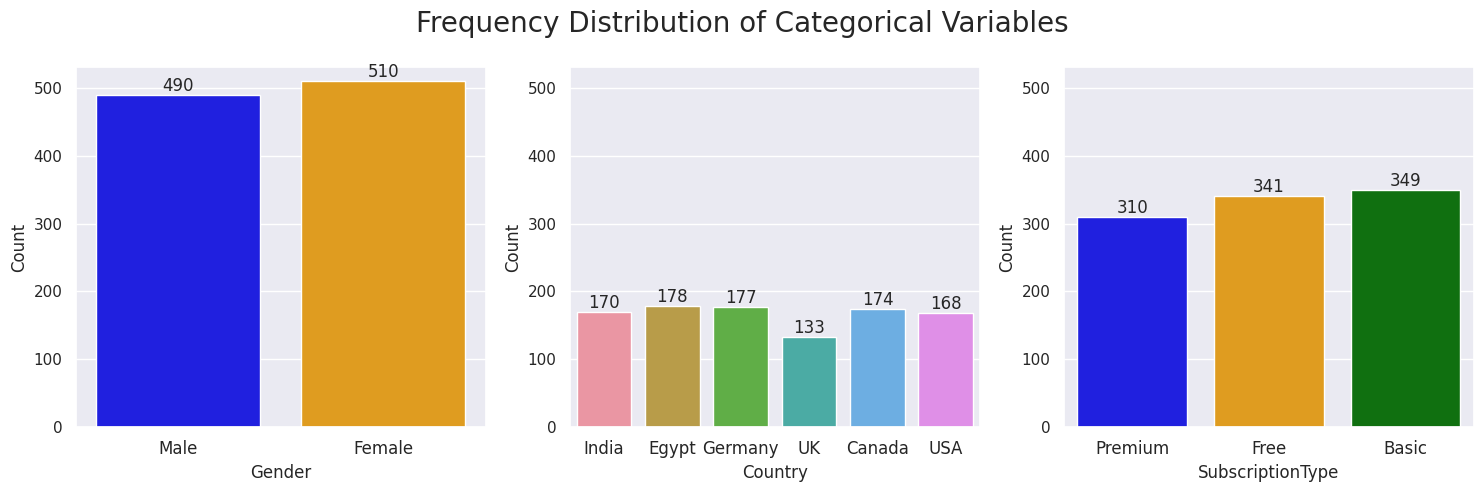

In [10]:
sns.set_style('darkgrid')
Colors  = ['blue' ,'orange' ,'green']
Catcols = df_data.select_dtypes(include = 'object').columns
Custom_palette = sns.set_palette(sns.color_palette(Colors))

fig ,ax = plt.subplots(nrows = 1 ,ncols = 3 ,figsize = (15,5) ,dpi=100)
for i ,col in enumerate(Catcols):
    graph = sns.countplot(data = df_data ,x = col ,ax = ax[i])
    ax[i].set_xlabel(col ,fontsize = 12)
    ax[i].set_ylabel('Count',fontsize = 12)
    ax[i].set_ylim([0,530])
    ax[i].set_xticklabels(ax[i].get_xticklabels() ,rotation = 0 ,fontsize = 12)
    for count in graph.containers:
        graph.bar_label(count)
        
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
plt.tight_layout()   
plt.show()


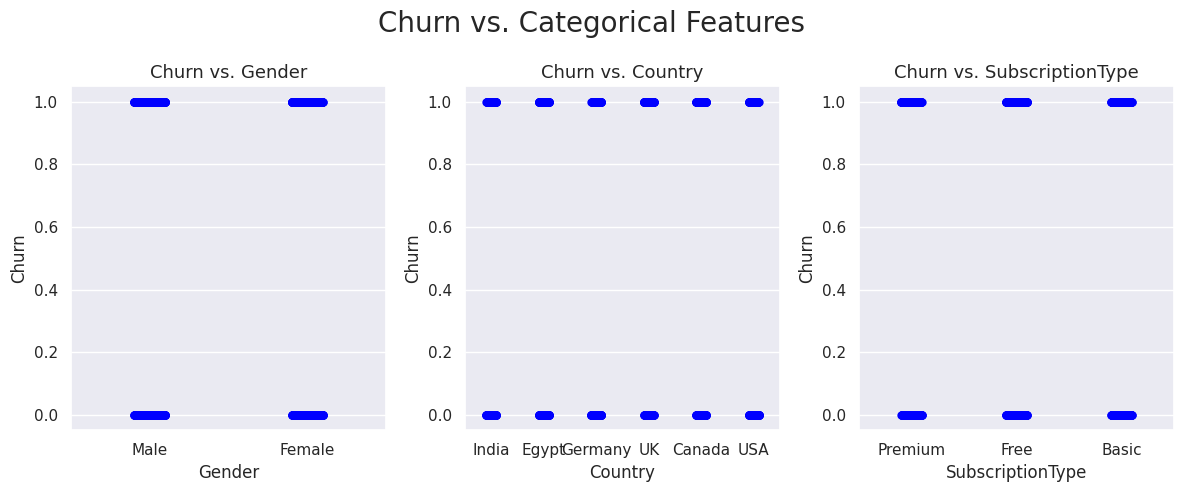

In [11]:
Color = 'blue' 
Catcols = df_data.select_dtypes(include = 'object').columns

fig ,ax = plt.subplots(nrows = 1 ,ncols = 3 ,figsize = (12,5) ,dpi=100)
for i,col in enumerate(Catcols):                                                                       #add random noise
    sns.stripplot(data = df_data ,x = col , y = df_data.Churn ,ax = ax[i] ,size = 6 ,color = Color ,jitter = True)
    ax[i].set_title('{} vs. {}'.format('Churn' ,col),fontsize = 13)
    ax[i].set_xlabel(col ,fontsize = 12)
    ax[i].set_ylabel('Churn' ,fontsize = 12)

plt.suptitle('Churn vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

# ◍ Step 5: Categorical Variables Encoding.

## 🔸 **Try One Hot Encoding**

In [13]:
Cat_cols = df_data.select_dtypes(include = 'object').columns
df_data1 = pd.get_dummies(df_data ,Cat_cols ,drop_first = True ,dtype = int)
df_data1.sample(5).style.set_properties(**{'background-color':'#2a9d8f','color':'white','border':'2.5px solid black'})

,Churn,Gender_Male,Country_Egypt,Country_Germany,Country_India,Country_UK,Country_USA,SubscriptionType_Free,SubscriptionType_Premium
169,0,0,1,0,0,0,0,1,0
91,1,0,1,0,0,0,0,0,0
823,0,1,1,0,0,0,0,0,1
100,0,1,0,0,0,0,1,1,0
2,1,1,1,0,0,0,0,0,1


## 🔸 Correlation Analysis On One Hot Encoding.

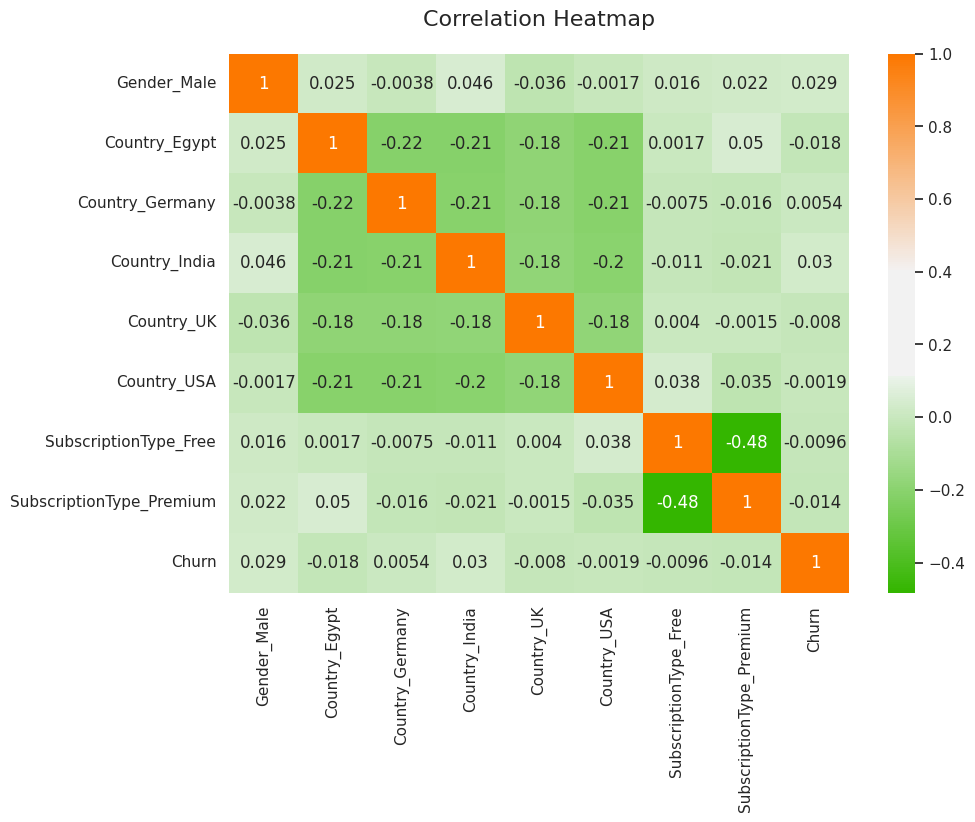

In [14]:
target = 'Churn'
#Create custom cmap_palette by diverging_palette
Cmap = sns.diverging_palette(125 ,28 ,s = 100 ,l = 65 ,sep = 50 ,as_cmap = True)
fig ,ax = plt.subplots(figsize = (10,7) ,dpi = 100)
ax = sns.heatmap(pd.concat([df_data1.drop(labels = target ,axis = 'columns') , df_data1[target]],axis = 'columns').corr() ,annot = True ,cmap = Cmap)
# drop target column as add and arrange it into last column ,which might be useful for readability.
plt.title('Correlation Heatmap', pad=20, fontsize=16)
plt.show()

### Apply hash encoding over the categorical features (Gender, Country, SubscriptionType).

# ◍ Step 6: Apply Hash Encoding.

## 🔸 Key Considerations for Choosing `n_features`

### 1. Trade-off Between Dimensionality and Collision
- **Higher `n_features`:**
  - Reduces the likelihood of hash collisions (two different feature values mapping to the same bucket).
  - Leads to a more accurate representation of the features.
  - Increases computational and memory costs.
- **Lower `n_features`:**
  - Saves memory and computation.
  - Increases the chance of hash collisions, where different features are mapped to the same bucket, potentially introducing noise.

---

### 2. Dataset Characteristics
- **Number of Unique Categories:**
  - If you have many unique feature combinations, a higher `n_features` is necessary to avoid excessive collisions.
  - For example, if your combined features create 1,000 unique strings, setting `n_features = 16` will likely result in significant collisions.
- **Size of Dataset:**
  - For smaller datasets, lower values of `n_features` might suffice.
  - For larger datasets with diverse features, higher values are typically needed.

---

### 3. Model Type
- **Tree-Based Models:**
  - Robust to collisions, so you can use lower values for `n_features`.
- **Linear Models or Deep Learning:**
  - Collisions may harm performance more significantly, necessitating a higher `n_features`.

---

## 🔸 Guidelines for Choosing `n_features`

### 1. Empirical Testing
- Start with a small value (e.g., `n_features = 16` or `32`) and gradually increase it, monitoring performance.
- Use tools like cross-validation to determine the optimal dimensionality.

### 2. Rule of Thumb
- If the number of unique feature combinations is \( N \), a good starting point for `n_features` is slightly larger than \( \sqrt{N} \).
- For \( N = 1,000 \), try `n_features = 32` or `64`.

### 3. Sparse Outputs
- If memory is a concern, keep the output of `FeatureHasher` as sparse (`sparse=True`) instead of converting it to dense arrays.


In [40]:
# Step 1: Define hash encoding with FeatureHasher
for n_features in [8,16,32,64,128,256]:
    # n_feature Define the number of hash buckets
    hasher = FeatureHasher(n_features = n_features , input_type = 'string')
    
    # Step 2: Combine categorical features into tuples (iterable of strings)
    combined_features = df_data[['Gender' ,'Country' ,'SubscriptionType']].apply(tuple ,axis = 1) # return datafream
    '''
    If we combine category cols in one string ,that will return error beacuse FeatureHasher needs an iterable of iterable structures (e.g., tuples or lists),
    and it will reutrn series
    ex..df_data['combined'] = df_data['Gender'] + "_" + df_data['Country'] + "_" + df_data['SubscriptionType']  
    
    '''
    # Step 3: Apply hash encoding
    hashed_features = hasher.transform(combined_features)   
    
    # Step 4: Convert hashed_features to  array
    hashed_features = hashed_features.toarray()
   
    '''
     If we have another Numerical cols ,we shold concatenate them with hashed_features
     num_cols = df_data.select_dtypes(include = 'number')
     numerical_features = df_data[num_cols].values  # Convert numerical column to NumPy array
     
     X = np.hstack([hashed_features ,numerical_features])
     y = df_data['target']

     Then start train model ,but in this sate we not have a numerical cols
    '''
    # Define X ,y data
    X = hashed_features
    y = df_data['Churn'] # Target
    X_train ,X_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.2 ,random_state = 42)

    # Define Classifer Model , Train it
    GB_Classifer_Model = GradientBoostingClassifier(random_state = 42)
    GB_Classifer_Model.fit(X_train ,y_train)

    # Evaluate the model
    accuracy = GB_Classifer_Model.score(X_test ,y_test)
    print(f"\n\nn_features = {n_features} ,Model accuracy: {accuracy * 100:.2f}%")
    
    y_pred = GB_Classifer_Model.predict(X_test)
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))



n_features = 8 ,Model accuracy: 56.50%
Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       104
           1       0.55      0.51      0.53        96

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



n_features = 16 ,Model accuracy: 56.50%
Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       104
           1       0.55      0.51      0.53        96

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



n_features = 32 ,Model accuracy: 56.50%
Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       104
           1       0.55      0.51      0

# ◍ Step 7: Show All Data After Chossing `n_features`.

In [42]:
n_features = 64 # Define the number of hash buckets
hasher = FeatureHasher(n_features = n_features , input_type = 'string')

# Step 2: Combine categorical features into tuples (iterable of strings)
combined_features = df_data[['Gender' ,'Country' ,'SubscriptionType']].apply(tuple ,axis = 1) # return datafream

# Step 3: Apply hash encoding
hashed_features = hasher.transform(combined_features)   

# Step 4: Convert hashed_features to  array
hashed_features = hashed_features.toarray()
# Define X ,y data
X = hashed_features
X = pd.DataFrame(X)
dataframe = pd.DataFrame(pd.concat([X ,df_data['Churn']],axis = 1))
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Churn
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>